In [1]:

# Librerías necesarias para manipulación de datos
import pandas as pd
from pathlib import Path

# Librerías de scikit learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Librerías para evaluación de modelos
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score

# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Librería de modelos de machine learning a comparar
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd

# Carga de los datos del archivo CSV en un DataFrame
ruta_archivo = r"C:\Users\34657\Desktop\datos3\datos.csv"
datos = pd.read_csv(ruta_archivo, delimiter='\t', header=0)
datos


,transcript name,SB_K-E120-0,SB_K-E220-0,SB_K-E223-0,SB_K-G120-0,SB_K-R221-0,SB_K-T260-0,SB_N-A201-0,SB_N-F228-0,SA_K-E120-1,...,NA_KMTH-0211,NA_KMUH-0119,NA_N-A120-3,NA_N-B222-3,NA_N-F129-3,NA_N-F220-3,NA_N-F226-3,NA_N-N223-3,NA_N-P221-3,NA_N-T201-3
0,NM_000014,5.758144,0.000000,0.000000,0.047027,0.808031,0.021548,0.239888,0.000000,0.026717,...,0.000000,0.163309,0.000000,0.292897,0.000000,0.000000,0.397269,0.000000,0.000000,1.021358
1,NM_000015,0.000000,0.000000,0.000000,0.000000,0.100733,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,NM_000016,1.228132,3.439690,0.139125,0.010069,0.254821,7.025397,1.463475,6.484207,0.000000,...,1.878897,2.156038,0.000000,2.088289,2.349155,1.823344,3.725838,0.000000,0.000000,2.723180
3,NM_000017,0.000000,0.524009,1.306547,0.000000,0.000000,2.152124,0.000000,0.644947,0.954118,...,2.083664,0.108134,0.176589,0.421486,0.278195,0.000000,1.192236,0.000000,0.000000,0.725241
4,NM_000018,1.628694,0.697810,0.602867,0.383446,10.007433,12.940651,0.016879,0.026325,2.516414,...,1.297889,5.105297,0.118932,1.652260,1.844609,1.310089,5.517231,2.021338,0.090432,2.645043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58659,NR_134467,0.000000,1.316378,0.000000,0.000000,0.000000,0.814813,0.973867,0.443242,0.721533,...,0.366671,0.836042,0.000000,0.045922,0.000000,0.464082,0.000000,0.000000,0.122643,0.517232
58660,NR_134468,0.143980,0.254664,1.958522,0.257175,0.000000,0.545849,6.032259,0.545676,0.304087,...,0.844560,0.355833,0.012683,0.331386,0.357535,0.238051,1.220612,1.732351,0.752431,0.370981
58661,NR_134469,0.604231,0.000000,0.006970,2.835693,5.568278,1.524683,0.007216,0.356329,2.849675,...,0.000000,1.212725,0.002296,0.021823,0.000000,0.010781,0.000000,0.630112,0.791118,0.051707
58662,NR_134470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [2]:
# Transponemos los datos para trabajar con filas como muestras
datos_transpuestos = datos.transpose()
datos_transpuestos.columns = datos_transpuestos.iloc[0]  # Usamos la primera fila como nombres de columnas
datos_transpuestos = datos_transpuestos[1:]  # Eliminamos la primera fila, ahora es el encabezado

# Añadimos las nuevas columnas 'Reacción' y 'Tratamiento'
reacciones = ['SDR', 'SDR', 'SDR', 'SDR', 'SDR', 'SDR', 'SDR', 'SDR', 
              'SDR', 'SDR', 'SDR', 'SDR', 'SDR', 'SDR', 'SDR', 'SDR', 
              'NON-SDR', 'NON-SDR', 'NON-SDR', 'NON-SDR', 'NON-SDR', 
              'NON-SDR', 'NON-SDR', 'NON-SDR', 'NON-SDR', 'NON-SDR', 
              'NON-SDR', 'NON-SDR', 'NON-SDR', 'NON-SDR', 'NON-SDR', 
              'NON-SDR', 'NON-SDR', 'NON-SDR', 'NON-SDR', 'NON-SDR']
              
tratamiento = ['ANTES', 'ANTES', 'ANTES', 'ANTES', 'ANTES', 'ANTES', 'ANTES', 'ANTES', 
               'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 
               'ANTES', 'ANTES', 'ANTES', 'ANTES', 'ANTES', 'ANTES', 'ANTES', 'ANTES', 
               'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 
               'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES', 'DESPUES']

# Insertamos las nuevas columnas 'Reacción' y 'Tratamiento' en el DataFrame
datos_transpuestos.insert(0, 'Reacción', reacciones)
datos_transpuestos.insert(1, 'Tratamiento', tratamiento)

# Creamos una nueva columna 'Categoria' combinando 'Reacción' y 'Tratamiento'
datos_transpuestos['Categoria'] = datos_transpuestos['Reacción'] + '-' + datos_transpuestos['Tratamiento']

datos_transpuestos

transcript name,Reacción,Tratamiento,NM_000014,NM_000015,NM_000016,NM_000017,NM_000018,NM_000019,NM_000020,NM_000021,...,NR_134463,NR_134464,NR_134465,NR_134466,NR_134467,NR_134468,NR_134469,NR_134470,NR_134471,Categoria
SB_K-E120-0,SDR,ANTES,5.758144,0.0,1.228132,0.0,1.628694,0.0,0.135138,6.550704,...,0.0,0.002229,0.684205,2.352194,0.0,0.14398,0.604231,0.0,0.023336,SDR-ANTES
SB_K-E220-0,SDR,ANTES,0.0,0.0,3.43969,0.524009,0.69781,2.010958,0.0,5.351524,...,0.0,0.020508,0.145389,0.812552,1.316378,0.254664,0.0,0.0,0.047972,SDR-ANTES
SB_K-E223-0,SDR,ANTES,0.0,0.0,0.139125,1.306547,0.602867,1.373221,0.0,2.024645,...,0.0,0.553266,1.23395,1.453152,0.0,1.958522,0.00697,0.0,0.012783,SDR-ANTES
SB_K-G120-0,SDR,ANTES,0.047027,0.0,0.010069,0.0,0.383446,2.033798,0.0,1.207094,...,0.0,0.353593,0.611121,0.347924,0.0,0.257175,2.835693,0.0,0.0,SDR-ANTES
SB_K-R221-0,SDR,ANTES,0.808031,0.100733,0.254821,0.0,10.007433,0.837198,0.069294,0.0,...,0.0,0.406509,0.493939,0.397907,0.0,0.0,5.568278,0.0,0.0,SDR-ANTES
SB_K-T260-0,SDR,ANTES,0.021548,0.0,7.025397,2.152124,12.940651,5.98455,0.0,1.157053,...,0.0,0.002767,0.064914,0.74298,0.814813,0.545849,1.524683,0.0,0.0,SDR-ANTES
SB_N-A201-0,SDR,ANTES,0.239888,0.0,1.463475,0.0,0.016879,4.125988,0.172842,4.321858,...,0.0,0.533127,1.539593,1.556815,0.973867,6.032259,0.007216,0.0,0.0,SDR-ANTES
SB_N-F228-0,SDR,ANTES,0.0,0.0,6.484207,0.644947,0.026325,5.397817,0.0,1.180939,...,0.0,0.000756,0.175102,1.048514,0.443242,0.545676,0.356329,0.0,0.0,SDR-ANTES
SA_K-E120-1,SDR,DESPUES,0.026717,0.0,0.0,0.954118,2.516414,1.742166,0.0,2.589627,...,0.0,0.020892,0.042289,0.720075,0.721533,0.304087,2.849675,0.0,0.140512,SDR-DESPUES
SA_K-E220-1,SDR,DESPUES,0.031241,0.0,13.396147,3.633015,0.102055,11.24928,0.0,4.774949,...,0.0,0.001875,1.470646,2.746588,1.401077,1.367934,0.012194,0.0,0.047288,SDR-DESPUES


In [3]:

# Verificamos si hay valores nulos que tendremos que eliminar. Con "result_data.isna()" se buscan los valores nulos y cada "sum.()" va a sumar, el primero las columnas, el segundo las filas y nos darán el total de valores nulos.
total_nan = datos_transpuestos.isna().sum().sum()

print(f"Número total de valores nulos: {total_nan}")

# Eliminamos las filas que contienen valores nulos y guardamos el resultado en una nueva variable: "clean_data". 
# El método ".dropna()" va a eliminar los valores nulos, "axis=1" indica que se borran las columnas y "how=any" indica que se van a borrar todas las que tengan mínimamente un valor nulo.
clean_data = datos_transpuestos.dropna(axis=1)

# Imprimimos las primeras filas del DataFrame después de eliminar los nulos.
print(clean_data.head())

# Verificamos si hay valores nulos que tendremos que eliminar todavía.
total_nan = clean_data.isna().sum().sum()
print(f"Número total de valores nulos: {total_nan}")

# Mostramos el tamaño del DataFrame con los datos limpios
clean_data.shape
clean_data.dtypes

Número total de valores nulos: 0
transcript name Reacción Tratamiento NM_000014 NM_000015 NM_000016 NM_000017  \
SB_K-E120-0          SDR       ANTES  5.758144       0.0  1.228132       0.0   
SB_K-E220-0          SDR       ANTES       0.0       0.0   3.43969  0.524009   
SB_K-E223-0          SDR       ANTES       0.0       0.0  0.139125  1.306547   
SB_K-G120-0          SDR       ANTES  0.047027       0.0  0.010069       0.0   
SB_K-R221-0          SDR       ANTES  0.808031  0.100733  0.254821       0.0   

transcript name  NM_000018 NM_000019 NM_000020 NM_000021  ... NR_134463  \
SB_K-E120-0       1.628694       0.0  0.135138  6.550704  ...       0.0   
SB_K-E220-0        0.69781  2.010958       0.0  5.351524  ...       0.0   
SB_K-E223-0       0.602867  1.373221       0.0  2.024645  ...       0.0   
SB_K-G120-0       0.383446  2.033798       0.0  1.207094  ...       0.0   
SB_K-R221-0      10.007433  0.837198  0.069294       0.0  ...       0.0   

transcript name NR_134464 NR_134465

transcript name
Reacción       object
Tratamiento    object
NM_000014      object
NM_000015      object
NM_000016      object
                ...  
NR_134468      object
NR_134469      object
NR_134470      object
NR_134471      object
Categoria      object
Length: 58667, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder

# Inicializamos el codificador de etiquetas
label_encoder_categoria = LabelEncoder()

# Transformamos la columna 'Categoria'
categoria_numerico = label_encoder_categoria.fit_transform(clean_data['Categoria'])

# Sustituimos las categorías en texto por numéricas
clean_data['Categoria'] = categoria_numerico

# Categorías únicas de 'Categoria'
print("Categorías únicas de 'Categoria':", label_encoder_categoria.classes_)
clean_data


Categorías únicas de 'Categoria': ['NON-SDR-ANTES' 'NON-SDR-DESPUES' 'SDR-ANTES' 'SDR-DESPUES']


transcript name,Reacción,Tratamiento,NM_000014,NM_000015,NM_000016,NM_000017,NM_000018,NM_000019,NM_000020,NM_000021,...,NR_134463,NR_134464,NR_134465,NR_134466,NR_134467,NR_134468,NR_134469,NR_134470,NR_134471,Categoria
SB_K-E120-0,SDR,ANTES,5.758144,0.0,1.228132,0.0,1.628694,0.0,0.135138,6.550704,...,0.0,0.002229,0.684205,2.352194,0.0,0.14398,0.604231,0.0,0.023336,2
SB_K-E220-0,SDR,ANTES,0.0,0.0,3.43969,0.524009,0.69781,2.010958,0.0,5.351524,...,0.0,0.020508,0.145389,0.812552,1.316378,0.254664,0.0,0.0,0.047972,2
SB_K-E223-0,SDR,ANTES,0.0,0.0,0.139125,1.306547,0.602867,1.373221,0.0,2.024645,...,0.0,0.553266,1.23395,1.453152,0.0,1.958522,0.00697,0.0,0.012783,2
SB_K-G120-0,SDR,ANTES,0.047027,0.0,0.010069,0.0,0.383446,2.033798,0.0,1.207094,...,0.0,0.353593,0.611121,0.347924,0.0,0.257175,2.835693,0.0,0.0,2
SB_K-R221-0,SDR,ANTES,0.808031,0.100733,0.254821,0.0,10.007433,0.837198,0.069294,0.0,...,0.0,0.406509,0.493939,0.397907,0.0,0.0,5.568278,0.0,0.0,2
SB_K-T260-0,SDR,ANTES,0.021548,0.0,7.025397,2.152124,12.940651,5.98455,0.0,1.157053,...,0.0,0.002767,0.064914,0.74298,0.814813,0.545849,1.524683,0.0,0.0,2
SB_N-A201-0,SDR,ANTES,0.239888,0.0,1.463475,0.0,0.016879,4.125988,0.172842,4.321858,...,0.0,0.533127,1.539593,1.556815,0.973867,6.032259,0.007216,0.0,0.0,2
SB_N-F228-0,SDR,ANTES,0.0,0.0,6.484207,0.644947,0.026325,5.397817,0.0,1.180939,...,0.0,0.000756,0.175102,1.048514,0.443242,0.545676,0.356329,0.0,0.0,2
SA_K-E120-1,SDR,DESPUES,0.026717,0.0,0.0,0.954118,2.516414,1.742166,0.0,2.589627,...,0.0,0.020892,0.042289,0.720075,0.721533,0.304087,2.849675,0.0,0.140512,3
SA_K-E220-1,SDR,DESPUES,0.031241,0.0,13.396147,3.633015,0.102055,11.24928,0.0,4.774949,...,0.0,0.001875,1.470646,2.746588,1.401077,1.367934,0.012194,0.0,0.047288,3


In [5]:
from sklearn.preprocessing import LabelEncoder

# Inicializamos el codificador de etiquetas
label_encoder_reactions = LabelEncoder()

# Transformamos las columnas de 'Reacción'
reactions_numerico = label_encoder_reactions.fit_transform(clean_data['Reacción'])

# Sustituimos las categorías en texto por numéricas
clean_data['Reacción'] = reactions_numerico

# Categorías únicas de "Reaction"
print("Categorías únicas de 'Reaction':", label_encoder_reactions.classes_)
clean_data

Categorías únicas de 'Reaction': ['NON-SDR' 'SDR']


transcript name,Reacción,Tratamiento,NM_000014,NM_000015,NM_000016,NM_000017,NM_000018,NM_000019,NM_000020,NM_000021,...,NR_134463,NR_134464,NR_134465,NR_134466,NR_134467,NR_134468,NR_134469,NR_134470,NR_134471,Categoria
SB_K-E120-0,1,ANTES,5.758144,0.0,1.228132,0.0,1.628694,0.0,0.135138,6.550704,...,0.0,0.002229,0.684205,2.352194,0.0,0.14398,0.604231,0.0,0.023336,2
SB_K-E220-0,1,ANTES,0.0,0.0,3.43969,0.524009,0.69781,2.010958,0.0,5.351524,...,0.0,0.020508,0.145389,0.812552,1.316378,0.254664,0.0,0.0,0.047972,2
SB_K-E223-0,1,ANTES,0.0,0.0,0.139125,1.306547,0.602867,1.373221,0.0,2.024645,...,0.0,0.553266,1.23395,1.453152,0.0,1.958522,0.00697,0.0,0.012783,2
SB_K-G120-0,1,ANTES,0.047027,0.0,0.010069,0.0,0.383446,2.033798,0.0,1.207094,...,0.0,0.353593,0.611121,0.347924,0.0,0.257175,2.835693,0.0,0.0,2
SB_K-R221-0,1,ANTES,0.808031,0.100733,0.254821,0.0,10.007433,0.837198,0.069294,0.0,...,0.0,0.406509,0.493939,0.397907,0.0,0.0,5.568278,0.0,0.0,2
SB_K-T260-0,1,ANTES,0.021548,0.0,7.025397,2.152124,12.940651,5.98455,0.0,1.157053,...,0.0,0.002767,0.064914,0.74298,0.814813,0.545849,1.524683,0.0,0.0,2
SB_N-A201-0,1,ANTES,0.239888,0.0,1.463475,0.0,0.016879,4.125988,0.172842,4.321858,...,0.0,0.533127,1.539593,1.556815,0.973867,6.032259,0.007216,0.0,0.0,2
SB_N-F228-0,1,ANTES,0.0,0.0,6.484207,0.644947,0.026325,5.397817,0.0,1.180939,...,0.0,0.000756,0.175102,1.048514,0.443242,0.545676,0.356329,0.0,0.0,2
SA_K-E120-1,1,DESPUES,0.026717,0.0,0.0,0.954118,2.516414,1.742166,0.0,2.589627,...,0.0,0.020892,0.042289,0.720075,0.721533,0.304087,2.849675,0.0,0.140512,3
SA_K-E220-1,1,DESPUES,0.031241,0.0,13.396147,3.633015,0.102055,11.24928,0.0,4.774949,...,0.0,0.001875,1.470646,2.746588,1.401077,1.367934,0.012194,0.0,0.047288,3


In [6]:
from sklearn.preprocessing import LabelEncoder

# Inicializamos el codificador de etiquetas
label_encoder_tratamiento = LabelEncoder()

# Transformamos las columnas de 'Tratamiento'
tratamiento_numerico = label_encoder_tratamiento.fit_transform(clean_data['Tratamiento'])

# Sustituimos las categorías en texto por numéricas
clean_data['Tratamiento'] = tratamiento_numerico

# Categorías únicas de "Tratamiento"
print("Categorías únicas de 'Tratamiento':", label_encoder_tratamiento.classes_)
clean_data

Categorías únicas de 'Tratamiento': ['ANTES' 'DESPUES']


transcript name,Reacción,Tratamiento,NM_000014,NM_000015,NM_000016,NM_000017,NM_000018,NM_000019,NM_000020,NM_000021,...,NR_134463,NR_134464,NR_134465,NR_134466,NR_134467,NR_134468,NR_134469,NR_134470,NR_134471,Categoria
SB_K-E120-0,1,0,5.758144,0.0,1.228132,0.0,1.628694,0.0,0.135138,6.550704,...,0.0,0.002229,0.684205,2.352194,0.0,0.14398,0.604231,0.0,0.023336,2
SB_K-E220-0,1,0,0.0,0.0,3.43969,0.524009,0.69781,2.010958,0.0,5.351524,...,0.0,0.020508,0.145389,0.812552,1.316378,0.254664,0.0,0.0,0.047972,2
SB_K-E223-0,1,0,0.0,0.0,0.139125,1.306547,0.602867,1.373221,0.0,2.024645,...,0.0,0.553266,1.23395,1.453152,0.0,1.958522,0.00697,0.0,0.012783,2
SB_K-G120-0,1,0,0.047027,0.0,0.010069,0.0,0.383446,2.033798,0.0,1.207094,...,0.0,0.353593,0.611121,0.347924,0.0,0.257175,2.835693,0.0,0.0,2
SB_K-R221-0,1,0,0.808031,0.100733,0.254821,0.0,10.007433,0.837198,0.069294,0.0,...,0.0,0.406509,0.493939,0.397907,0.0,0.0,5.568278,0.0,0.0,2
SB_K-T260-0,1,0,0.021548,0.0,7.025397,2.152124,12.940651,5.98455,0.0,1.157053,...,0.0,0.002767,0.064914,0.74298,0.814813,0.545849,1.524683,0.0,0.0,2
SB_N-A201-0,1,0,0.239888,0.0,1.463475,0.0,0.016879,4.125988,0.172842,4.321858,...,0.0,0.533127,1.539593,1.556815,0.973867,6.032259,0.007216,0.0,0.0,2
SB_N-F228-0,1,0,0.0,0.0,6.484207,0.644947,0.026325,5.397817,0.0,1.180939,...,0.0,0.000756,0.175102,1.048514,0.443242,0.545676,0.356329,0.0,0.0,2
SA_K-E120-1,1,1,0.026717,0.0,0.0,0.954118,2.516414,1.742166,0.0,2.589627,...,0.0,0.020892,0.042289,0.720075,0.721533,0.304087,2.849675,0.0,0.140512,3
SA_K-E220-1,1,1,0.031241,0.0,13.396147,3.633015,0.102055,11.24928,0.0,4.774949,...,0.0,0.001875,1.470646,2.746588,1.401077,1.367934,0.012194,0.0,0.047288,3


In [7]:
#Creamos una función para compartir los valores en float.

import numpy as np

def clean_and_convert(value):
    # Verificamos si el valor es una cadena
    if isinstance(value, str):
        # Reemplazamos "Not quantified" con NaN y luego convertimos a float
        if value == 'Not quantified':
            return np.nan
        else:
            # Eliminamos comas y convertir a float
            return float(value.replace(',', ''))
    else:
        return value

# Aplicamos la función a cada celda de las columnas
clean_data = clean_data.applymap(clean_and_convert)

clean_data

C:\Users\34657\AppData\Local\Temp\ipykernel_30648\1736458553.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_data = clean_data.applymap(clean_and_convert)


transcript name,Reacción,Tratamiento,NM_000014,NM_000015,NM_000016,NM_000017,NM_000018,NM_000019,NM_000020,NM_000021,...,NR_134463,NR_134464,NR_134465,NR_134466,NR_134467,NR_134468,NR_134469,NR_134470,NR_134471,Categoria
SB_K-E120-0,1,0,5.758144,0.000000,1.228132,0.000000,1.628694,0.000000,0.135138,6.550704,...,0.000000,0.002229,0.684205,2.352194,0.000000,0.143980,0.604231,0.000000,0.023336,2
SB_K-E220-0,1,0,0.000000,0.000000,3.439690,0.524009,0.697810,2.010958,0.000000,5.351524,...,0.000000,0.020508,0.145389,0.812552,1.316378,0.254664,0.000000,0.000000,0.047972,2
SB_K-E223-0,1,0,0.000000,0.000000,0.139125,1.306547,0.602867,1.373221,0.000000,2.024645,...,0.000000,0.553266,1.233950,1.453152,0.000000,1.958522,0.006970,0.000000,0.012783,2
SB_K-G120-0,1,0,0.047027,0.000000,0.010069,0.000000,0.383446,2.033798,0.000000,1.207094,...,0.000000,0.353593,0.611121,0.347924,0.000000,0.257175,2.835693,0.000000,0.000000,2
SB_K-R221-0,1,0,0.808031,0.100733,0.254821,0.000000,10.007433,0.837198,0.069294,0.000000,...,0.000000,0.406509,0.493939,0.397907,0.000000,0.000000,5.568278,0.000000,0.000000,2
SB_K-T260-0,1,0,0.021548,0.000000,7.025397,2.152124,12.940651,5.984550,0.000000,1.157053,...,0.000000,0.002767,0.064914,0.742980,0.814813,0.545849,1.524683,0.000000,0.000000,2
SB_N-A201-0,1,0,0.239888,0.000000,1.463475,0.000000,0.016879,4.125988,0.172842,4.321858,...,0.000000,0.533127,1.539593,1.556815,0.973867,6.032259,0.007216,0.000000,0.000000,2
SB_N-F228-0,1,0,0.000000,0.000000,6.484207,0.644947,0.026325,5.397817,0.000000,1.180939,...,0.000000,0.000756,0.175102,1.048514,0.443242,0.545676,0.356329,0.000000,0.000000,2
SA_K-E120-1,1,1,0.026717,0.000000,0.000000,0.954118,2.516414,1.742166,0.000000,2.589627,...,0.000000,0.020892,0.042289,0.720075,0.721533,0.304087,2.849675,0.000000,0.140512,3
SA_K-E220-1,1,1,0.031241,0.000000,13.396147,3.633015,0.102055,11.249280,0.000000,4.774949,...,0.000000,0.001875,1.470646,2.746588,1.401077,1.367934,0.012194,0.000000,0.047288,3


In [8]:
# Verificamos NUEVAMENTE si hay valores nulos que tendremos que eliminar. Con "result_data.isna()" se buscan los valores nulos y cada "sum.()" va a sumar, el primero las columnas, el segundo las filas y nos darán el total de valores nulos.
total_nan = clean_data.isna().sum().sum()

print(f"Número total de valores nulos: {total_nan}")
clean_data_final = clean_data.dropna(axis=1)

# Imprimimos las primeras filas del DataFrame después de eliminar los nulos.
print(clean_data_final.head())

Número total de valores nulos: 0
transcript name  Reacción  Tratamiento  NM_000014  NM_000015  NM_000016  \
SB_K-E120-0             1            0   5.758144   0.000000   1.228132   
SB_K-E220-0             1            0   0.000000   0.000000   3.439690   
SB_K-E223-0             1            0   0.000000   0.000000   0.139125   
SB_K-G120-0             1            0   0.047027   0.000000   0.010069   
SB_K-R221-0             1            0   0.808031   0.100733   0.254821   

transcript name  NM_000017  NM_000018  NM_000019  NM_000020  NM_000021  ...  \
SB_K-E120-0       0.000000   1.628694   0.000000   0.135138   6.550704  ...   
SB_K-E220-0       0.524009   0.697810   2.010958   0.000000   5.351524  ...   
SB_K-E223-0       1.306547   0.602867   1.373221   0.000000   2.024645  ...   
SB_K-G120-0       0.000000   0.383446   2.033798   0.000000   1.207094  ...   
SB_K-R221-0       0.000000  10.007433   0.837198   0.069294   0.000000  ...   

transcript name  NR_134463  NR_134464  NR

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import f_oneway  # Para el test ANOVA

# Mantenemos las etiquetas de clase 'Categoria' separadas
etiquetas = clean_data_final['Categoria']

# Seleccionamos todas las columnas excepto 'Categoria', 'Reacción' y 'Tratamiento' para normalizar
sin_categoria = clean_data_final.drop(columns=['Categoria', 'Reacción', 'Tratamiento'])

# Normalizamos los datos
scaler = StandardScaler()
sin_categoria_norm = scaler.fit_transform(sin_categoria)

# Reconstruimos el DataFrame normalizado con etiquetas
sin_categoria_norm_df = pd.DataFrame(sin_categoria_norm, columns=sin_categoria.columns)
sin_categoria_norm_df['Categoria'] = etiquetas.values

# Seleccionamos las columnas de expresión génica según las 4 categorías
grupo_1 = sin_categoria_norm_df[sin_categoria_norm_df['Categoria'] == 0].iloc[:, :-1]  # SDR-ANTES
grupo_2 = sin_categoria_norm_df[sin_categoria_norm_df['Categoria'] == 1].iloc[:, :-1]  # SDR-DESPUÉS
grupo_3 = sin_categoria_norm_df[sin_categoria_norm_df['Categoria'] == 2].iloc[:, :-1]  # NON-SDR-ANTES
grupo_4 = sin_categoria_norm_df[sin_categoria_norm_df['Categoria'] == 3].iloc[:, :-1]  # NON-SDR-DESPUÉS

# Realizamos el test ANOVA para cada gen y obtenemos el p-valor
p_values_anova = [f_oneway(grupo_1.iloc[:, i], grupo_2.iloc[:, i], grupo_3.iloc[:, i], grupo_4.iloc[:, i])[1] for i in range(grupo_1.shape[1])]

# Creamos un DataFrame con los p-valores
p_values_anova_df = pd.DataFrame(p_values_anova, index=grupo_1.columns, columns=['Valor_p'])

# Mostramos los 50 genes con los valores p más pequeños
print("Los 50 genes con los valores p más pequeños en el análisis ANOVA:")
print(p_values_anova_df.nsmallest(50, 'Valor_p'))


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Los 50 genes con los valores p más pequeños en el análisis ANOVA:
                      Valor_p
transcript name              
NR_004387        4.124871e-13
NR_002312        3.521553e-12
NR_003006        6.537934e-12
NR_002716_dup8   2.037901e-11
NR_132753        4.753381e-11
NR_003008        9.158294e-11
NM_020437        1.682876e-10
NR_002716_dup7   1.847900e-10
NM_001105530     3.138519e-10
NR_002716_dup6   4.063747e-10
NR_003010        6.848493e-10
NM_001078172     1.697157e-09
NR_002716_dup9   2.067793e-09
NM_017907        2.423020e-09
NM_000281        2.471389e-09
NM_004637        2.882568e-09
NR_046600        3.179135e-09
NR_002716_dup5   3.572282e-09
NM_032704        3.684532e-09
NR_002822        7.156665e-09
NR_003023        9.159419e-09
NM_145182        9.338631e-09
NM_004218        9.677081e-09
NR_003051        1.040976e-08
NM_005370        1.375833e-08
NM_025239        1.397552e-08
NM_198183        1.421055e-08
NM_178841        2.184394e-08
NR_002716_dup2   2.476587e-08
NM_0

C:\Users\34657\AppData\Local\Temp\ipykernel_30648\922367798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genes_data['Categoria'] = clean_data_final['Categoria']


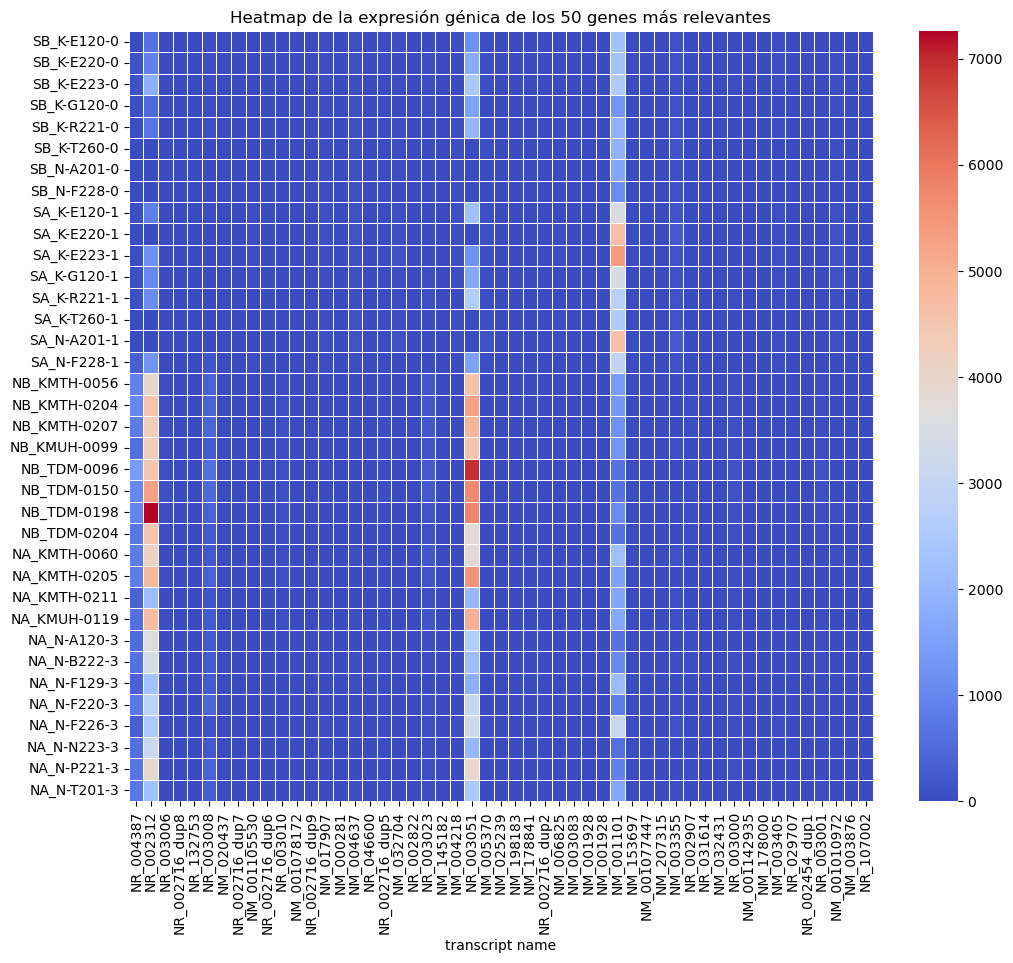

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos el DataFrame original para mantener solo los 50 genes más relevantes
top_genes = p_values_anova_df.nsmallest(50, 'Valor_p').index
top_genes_data = clean_data_final[top_genes]

# Agregamos la columna de 'Categoria' para los colores en el heatmap
top_genes_data['Categoria'] = clean_data_final['Categoria']

# Creamos un heatmap de la expresión génica (sin correlación) con anotaciones de las categorías
plt.figure(figsize=(12, 10))
sns.heatmap(top_genes_data.drop(columns=['Categoria']), cmap="coolwarm", linewidths=.5)
plt.title("Heatmap de la expresión génica de los 50 genes más relevantes")
plt.show()


In [13]:
# Guardamos los nombres de los genes más relevantes
top_50_genes = top_genes.tolist()
print("Los 50 genes más relevantes son:", top_50_genes)

# Guardamos los nombres en un archivo de texto
with open('top_50_genes.txt', 'w') as f:
    for gene in top_50_genes:
        f.write(f"{gene}\n")


Los 50 genes más relevantes son: ['NR_004387', 'NR_002312', 'NR_003006', 'NR_002716_dup8', 'NR_132753', 'NR_003008', 'NM_020437', 'NR_002716_dup7', 'NM_001105530', 'NR_002716_dup6', 'NR_003010', 'NM_001078172', 'NR_002716_dup9', 'NM_017907', 'NM_000281', 'NM_004637', 'NR_046600', 'NR_002716_dup5', 'NM_032704', 'NR_002822', 'NR_003023', 'NM_145182', 'NM_004218', 'NR_003051', 'NM_005370', 'NM_025239', 'NM_198183', 'NM_178841', 'NR_002716_dup2', 'NM_006825', 'NM_003083', 'NM_001928', 'NM_001101', 'NM_153697', 'NM_001077447', 'NM_207315', 'NM_003355', 'NR_002907', 'NR_031614', 'NM_032431', 'NR_003000', 'NM_001142935', 'NM_178000', 'NM_003405', 'NR_029707', 'NR_002454_dup1', 'NR_003001', 'NM_001010972', 'NM_003876', 'NR_107002']


In [14]:
# Creamos un subconjunto con los 50 genes más relevantes y la columna 'Categoria' como etiqueta
X = top_genes_data.drop(columns=['Categoria'])
y = top_genes_data['Categoria']

# Dividimos los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrenam el modelo RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_rf = rf_classifier.predict(X_test)

# Mostram los resultados
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("Exactitud:", accuracy_score(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.50      0.50      0.50         8
weighted avg       0.75      0.75      0.75         8

Matriz de Confusión:
[[2 0 0 0]
 [0 4 0 0]
 [0 0 0 0]
 [0 0 2 0]]
Exactitud: 0.75


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\ana

In [16]:
from sklearn.svm import SVC

# Entrenamos el modelo SVM
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_svm = svm_classifier.predict(X_test)

# Mostramos los resultados
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_svm))
print("Exactitud:", accuracy_score(y_test, y_pred_svm))


SVM Results:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         0
           3       1.00      0.50      0.67         2

    accuracy                           0.50         8
   macro avg       0.67      0.38      0.48         8
weighted avg       0.83      0.50      0.62         8

Matriz de Confusión:
[[1 1 0 0]
 [0 2 2 0]
 [0 0 0 0]
 [0 0 1 1]]
Exactitud: 0.5


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenamos el modelo Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_gb = gb_classifier.predict(X_test)

# Mostramos los resultados
print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_gb))
print("Exactitud:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.45      0.50      0.47         8
weighted avg       0.65      0.75      0.69         8

Matriz de Confusión:
[[2 0 0 0]
 [0 4 0 0]
 [0 0 0 0]
 [0 1 1 0]]
Exactitud: 0.75


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\ana

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamos el modelo KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_knn = knn_classifier.predict(X_test)

# Mostramos los resultados
print("KNN Results:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))
print("Exactitud:", accuracy_score(y_test, y_pred_knn))


KNN Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         4
           2       0.00      0.00      0.00         0
           3       1.00      0.50      0.67         2

    accuracy                           0.62         8
   macro avg       0.75      0.50      0.58         8
weighted avg       1.00      0.62      0.75         8

Matriz de Confusión:
[[2 0 0 0]
 [0 2 2 0]
 [0 0 0 0]
 [0 0 1 1]]
Exactitud: 0.625


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
from sklearn.linear_model import LogisticRegression

# Entrenamos el modelo de Regresión Logística
lr_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_lr = lr_classifier.predict(X_test)

# Mostramos los resultados
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lr))
print("Exactitud:", accuracy_score(y_test, y_pred_lr))


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.62         8
   macro avg       0.45      0.38      0.39         8
weighted avg       0.65      0.62      0.61         8

Matriz de Confusión:
[[1 1 0 0]
 [0 4 0 0]
 [0 0 0 0]
 [0 0 2 0]]
Exactitud: 0.625


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and be

In [20]:
from sklearn.ensemble import AdaBoostClassifier

# Entrenam el modelo AdaBoost
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred_ada = ada_classifier.predict(X_test)

# Mostram los resultados
print("AdaBoost Results:")
print(classification_report(y_test, y_pred_ada))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_ada))
print("Exactitud:", accuracy_score(y_test, y_pred_ada))


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.50         8
   macro avg       0.17      0.25      0.20         8
weighted avg       0.33      0.50      0.40         8

Matriz de Confusión:
[[0 2 0 0]
 [0 4 0 0]
 [0 0 0 0]
 [1 0 1 0]]
Exactitud: 0.5


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\ana

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Aplicamos SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Verificamos las clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:", pd.Series(y_train_sm).value_counts())



Distribución de clases después de SMOTE: Categoria
3    8
0    8
1    8
2    8
Name: count, dtype: int64


In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Reentrenar los modelos con los datos balanceados
# Random Forest
rf_classifier_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_sm.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rf_classifier_sm.predict(X_test)

# SVM
svm_classifier_sm = SVC(kernel='linear', random_state=42)
svm_classifier_sm.fit(X_train_sm, y_train_sm)
y_pred_svm_sm = svm_classifier_sm.predict(X_test)

# Gradient Boosting
gb_classifier_sm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier_sm.fit(X_train_sm, y_train_sm)
y_pred_gb_sm = gb_classifier_sm.predict(X_test)

# Logistic Regression
lr_classifier_sm = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr_classifier_sm.fit(X_train_sm, y_train_sm)
y_pred_lr_sm = lr_classifier_sm.predict(X_test)

# K-Nearest Neighbors
knn_classifier_sm = KNeighborsClassifier(n_neighbors=5)
knn_classifier_sm.fit(X_train_sm, y_train_sm)
y_pred_knn_sm = knn_classifier_sm.predict(X_test)

# AdaBoost
ada_classifier_sm = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier_sm.fit(X_train_sm, y_train_sm)
y_pred_ada_sm = ada_classifier_sm.predict(X_test)

# Mostrar los resultados para todos los modelos reentrenados
resultados_sm = {
    'Random Forest (SMOTE)': (classification_report(y_test, y_pred_rf_sm), confusion_matrix(y_test, y_pred_rf_sm), accuracy_score(y_test, y_pred_rf_sm)),
    'SVM (SMOTE)': (classification_report(y_test, y_pred_svm_sm), confusion_matrix(y_test, y_pred_svm_sm), accuracy_score(y_test, y_pred_svm_sm)),
    'Gradient Boosting (SMOTE)': (classification_report(y_test, y_pred_gb_sm), confusion_matrix(y_test, y_pred_gb_sm), accuracy_score(y_test, y_pred_gb_sm)),
    'Logistic Regression (SMOTE)': (classification_report(y_test, y_pred_lr_sm), confusion_matrix(y_test, y_pred_lr_sm), accuracy_score(y_test, y_pred_lr_sm)),
    'KNN (SMOTE)': (classification_report(y_test, y_pred_knn_sm), confusion_matrix(y_test, y_pred_knn_sm), accuracy_score(y_test, y_pred_knn_sm)),
    'AdaBoost (SMOTE)': (classification_report(y_test, y_pred_ada_sm), confusion_matrix(y_test, y_pred_ada_sm), accuracy_score(y_test, y_pred_ada_sm))
}

for modelo, resultado in resultados_sm.items():
    print(f"Resultados de {modelo}:")
    print(f"Classification Report:\n{resultado[0]}")
    print(f"Confusion Matrix:\n{resultado[1]}")
    print(f"Accuracy: {resultado[2]}\n")



C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remove

Resultados de Random Forest (SMOTE):
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.50      0.50      0.50         8
weighted avg       0.75      0.75      0.75         8

Confusion Matrix:
[[2 0 0 0]
 [0 4 0 0]
 [0 0 0 0]
 [0 0 2 0]]
Accuracy: 0.75

Resultados de SVM (SMOTE):
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         0
           3       1.00      0.50      0.67         2

    accuracy                           0.50         8
   macro avg       0.67      0.38      0.48       

C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\ana

In [30]:
from sklearn.model_selection import GridSearchCV

# Definimos los hiperparámetros a ajustar
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Implementamos GridSearchCV para RandomForest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_sm, y_train_sm)

# Mostramos los mejores hiperparámetros
print("Mejores hiperparámetros para Random Forest:", grid_search_rf.best_params_)

# Usamos los mejores hiperparámetros para reentrenar el modelo
best_rf_classifier = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_classifier.predict(X_test)

# Mostramos resultados del modelo ajustado
print("Resultados del modelo Random Forest ajustado:")
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Resultados del modelo Random Forest ajustado:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.50      0.50      0.50         8
weighted avg       0.75      0.75      0.75         8

[[2 0 0 0]
 [0 4 0 0]
 [0 0 0 0]
 [0 0 2 0]]
Accuracy: 0.75


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\ana

In [32]:
# Definimos los hiperparámetros a ajustar para Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Implementamos GridSearchCV para Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5)
grid_search_gb.fit(X_train_sm, y_train_sm)

# Mostramos los mejores hiperparámetros
print("Mejores hiperparámetros para Gradient Boosting:", grid_search_gb.best_params_)

# Usamos los mejores hiperparámetros para reentrenar el modelo
best_gb_classifier = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_classifier.predict(X_test)

# Mostramos los resultados del modelo ajustado
print("Resultados del modelo Gradient Boosting ajustado:")
print(classification_report(y_test, y_pred_best_gb))
print(confusion_matrix(y_test, y_pred_best_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_best_gb))


Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Resultados del modelo Gradient Boosting ajustado:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.50      0.50      0.50         8
weighted avg       0.75      0.75      0.75         8

[[2 0 0 0]
 [0 4 0 0]
 [0 0 0 0]
 [0 0 2 0]]
Accuracy: 0.75


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\34657\ana

Es muy probable que si las clases 2 (NON-SDR-ANTES) y 3 (NON-SDR-DESPUÉS) corresponden a pacientes que no han tenido reacciones adversas y no presentan diferencias significativas en la expresión génica entre antes y después del tratamiento, los genes que seleccionamos (basados en su significancia para predecir reacciones adversas) no capturen información relevante para distinguir estas clases. Por tanto, realizaremos el análisis uniendo el grupo 2 y 3 como un solo grupo.

In [34]:
# Unimos las clases 2 y 3 en una sola clase (por ejemplo, clase 2)
clean_data_final['Categoria'] = clean_data_final['Categoria'].replace({3: 2})

# Verificamos la nueva distribución de clases
print(clean_data_final['Categoria'].value_counts())


Categoria
2    16
1    12
0     8
Name: count, dtype: int64


In [36]:
# Unimos las clases 2 y 3 en los datos de entrenamiento y prueba
y_train_sm = y_train_sm.replace({3: 2})
y_test = y_test.replace({3: 2})

# Verificamos que solo existan 3 clases
print(y_train_sm.value_counts())
print(y_test.value_counts())



Categoria
2    16
0     8
1     8
Name: count, dtype: int64
Categoria
1    4
2    2
0    2
Name: count, dtype: int64


In [38]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Lista de modelos que probaremos
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Diccionario para almacenar los resultados de cada modelo
resultados_modelos = []

# Probamos cada modelo y almacenamos los resultados
for nombre, modelo in modelos.items():
    # Entrenamos el modelo
    modelo.fit(X_train_sm, y_train_sm)
    
    # Predecimos en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Obtenemos las métricas de rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Guardamos los resultados
    resultados_modelos.append({
        'Modelo': nombre,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'Confusion Matrix': confusion
    })

# Convertimos los resultados a DataFrame
resultados_df = pd.DataFrame(resultados_modelos)

# Mostramos la tabla de resultados
print(resultados_df)


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                Modelo  Accuracy  Precision  Recall  F1-Score  \
0        Random Forest     1.000   1.000000   1.000  1.000000   
1    Gradient Boosting     1.000   1.000000   1.000  1.000000   
2                  SVM     0.625   0.708333   0.625  0.619048   
3  Logistic Regression     0.875   0.900000   0.875  0.861111   
4                  KNN     0.750   0.875000   0.750  0.750000   
5             AdaBoost     0.875   0.900000   0.875  0.861111   

                    Confusion Matrix  
0  [[2, 0, 0], [0, 4, 0], [0, 0, 2]]  
1  [[2, 0, 0], [0, 4, 0], [0, 0, 2]]  
2  [[1, 1, 0], [0, 2, 2], [0, 0, 2]]  
3  [[1, 1, 0], [0, 4, 0], [0, 0, 2]]  
4  [[2, 0, 0], [0, 2, 2], [0, 0, 2]]  
5  [[1, 1, 0], [0, 4, 0], [0, 0, 2]]  


In [40]:
# Guardamos los resultados en un archivo CSV
resultados_df.to_csv('resultados_modelos.csv', index=False)

print("Los resultados han sido guardados en 'resultados_modelos.csv'.")



Los resultados han sido guardados en 'resultados_modelos.csv'.


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


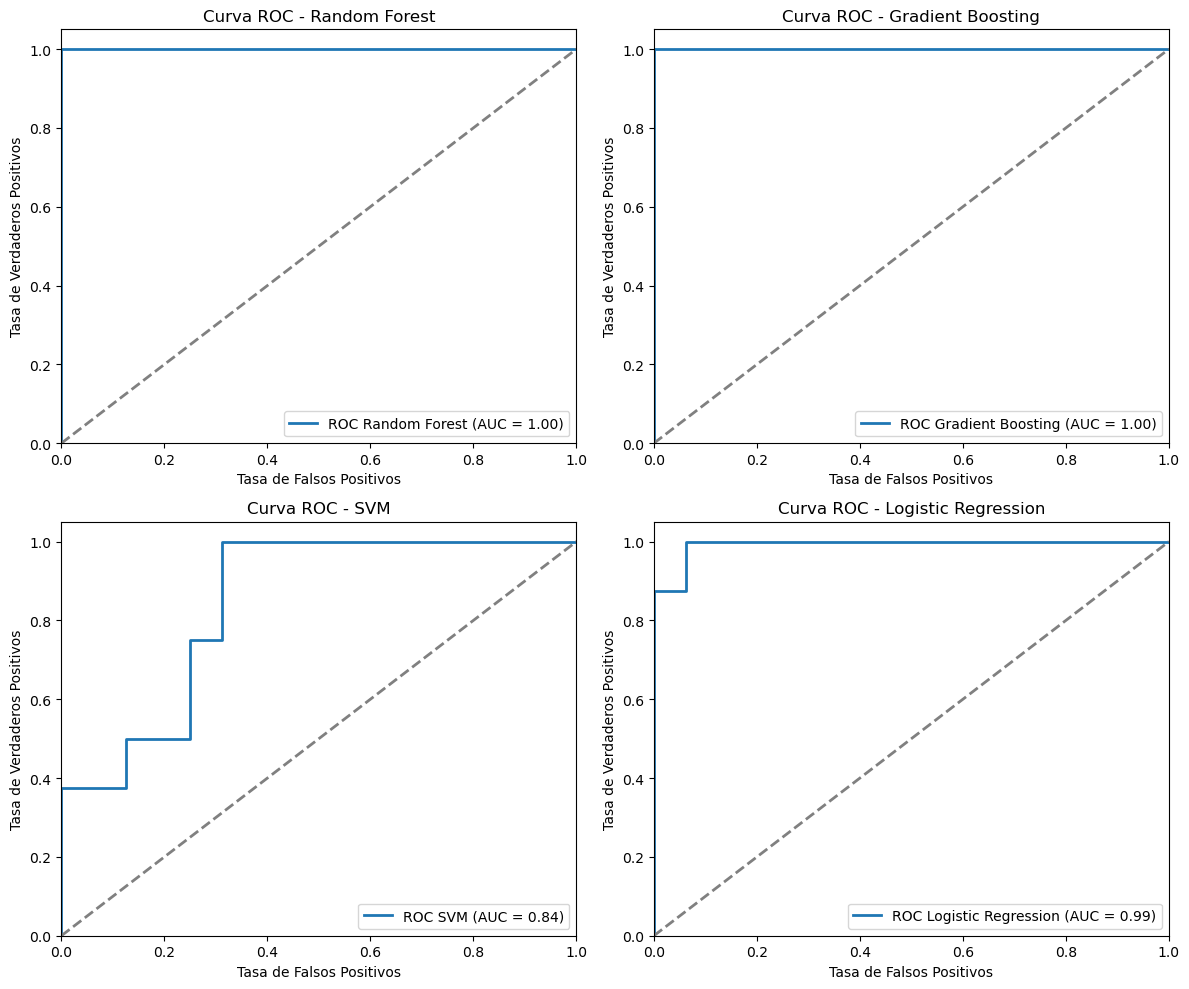

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizamos las etiquetas para ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Creamos una figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Lista de modelos a usar (4 modelos como ejemplo)
modelos_seleccionados = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
}

# Iteraramos sobre los modelos y sus posiciones en el gráfico
for (nombre, modelo), ax in zip(modelos_seleccionados.items(), axs.ravel()):
    # Entrenar el modelo
    modelo.fit(X_train_sm, y_train_sm)
    
    # Calculamos las probabilidades
    y_prob = modelo.predict_proba(X_test)
    
    # Calculamos la curva ROC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc = auc(fpr, tpr)
    
    # Plot de la curva ROC en el subplot correspondiente
    ax.plot(fpr, tpr, lw=2, label=f'ROC {nombre} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title(f'Curva ROC - {nombre}')
    ax.legend(loc="lower right")

# Ajustamos el layout de los gráficos
plt.tight_layout()
plt.show()


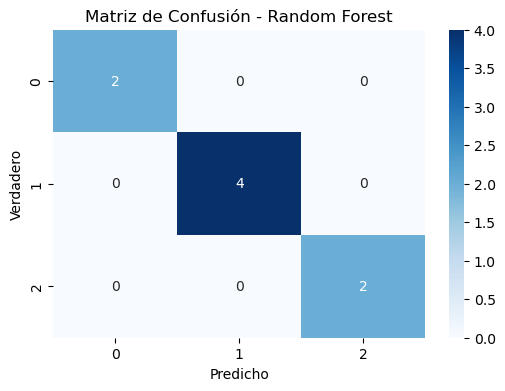

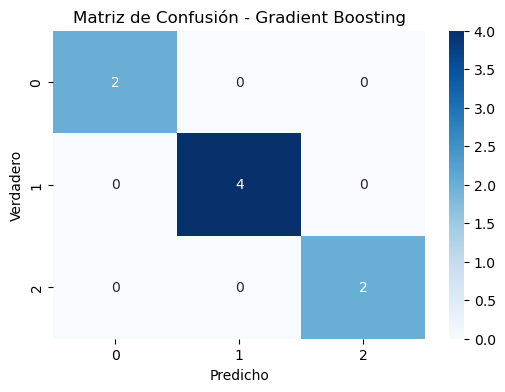

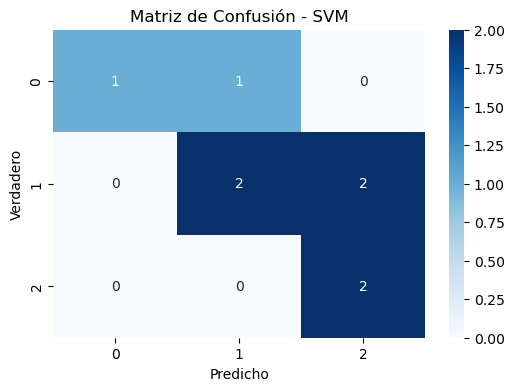

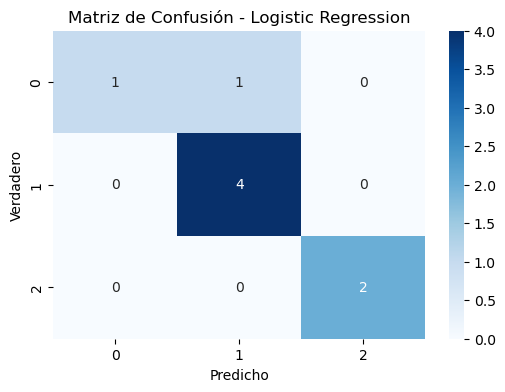

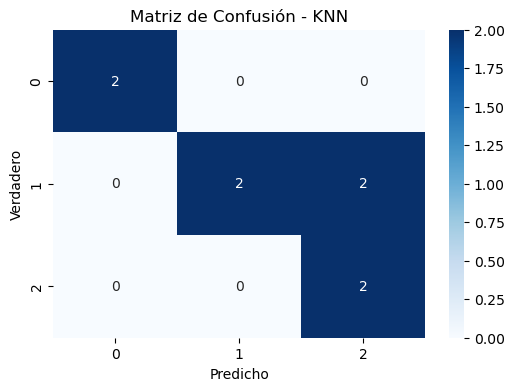

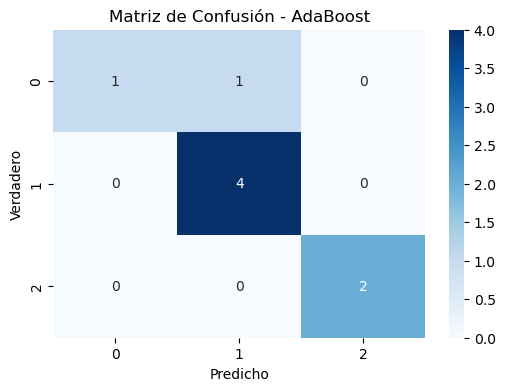

In [43]:
import seaborn as sns

# Creamos matrices de confusión
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plot de la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Nos aseguramos de que las etiquetas estén en formato categórico
encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train_sm), num_classes=3)
y_test_encoded = to_categorical(encoder.transform(y_test), num_classes=3)

# Creamos el modelo de Deep Learning
model = Sequential()

# Capa de entrada y primeras capas densas con activación ReLU
model.add(Dense(128, input_dim=X_train_sm.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Añadir dropout para evitar sobreajuste
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida (3 clases)
model.add(Dense(3, activation='softmax'))

# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenanos el modelo
history = model.fit(X_train_sm, y_train_encoded, epochs=50, batch_size=16, validation_data=(X_test, y_test_encoded))

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 469ms/step - accuracy: 0.1875 - loss: 669.0014 - val_accuracy: 0.2500 - val_loss: 168.0880
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3542 - loss: 486.2840 - val_accuracy: 0.2500 - val_loss: 174.1196
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1875 - loss: 692.9229 - val_accuracy: 0.2500 - val_loss: 125.2567
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1875 - loss: 518.7660 - val_accuracy: 0.3750 - val_loss: 92.0381
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2917 - loss: 433.4382 - val_accuracy: 0.3750 - val_loss: 78.2568
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4375 - loss: 342.5361 - val_accuracy: 0.5000 - val_loss: 88.5661
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3542 - loss: 499.0263 - val_accuracy: 0.5000 - val_loss: 113.4629
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3958 - loss: 308.1123 - val_accuracy

In [46]:

# Creamos el modelo con una arquitectura más profunda y regularización L2
model = Sequential()

# Primera capa oculta con regularización L2
model.add(Dense(256, input_dim=X_train_sm.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  # Dropout para evitar sobreajuste

# Segunda capa oculta
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Tercera capa oculta
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Capa de salida con softmax
model.add(Dense(3, activation='softmax'))

# Compilamos el modelo con el optimizador RMSprop
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(X_train_sm, y_train_encoded, epochs=100, batch_size=16, validation_data=(X_test, y_test_encoded))

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')


C:\Users\34657\anaconda3\envs\tfm1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 572ms/step - accuracy: 0.3958 - loss: 677.1961 - val_accuracy: 0.2500 - val_loss: 97.8521
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3542 - loss: 382.4854 - val_accuracy: 0.7500 - val_loss: 59.4520
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5625 - loss: 273.7847 - val_accuracy: 0.6250 - val_loss: 125.7148
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4375 - loss: 300.1062 - val_accuracy: 0.6250 - val_loss: 47.4588
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5000 - loss: 274.2891 - val_accuracy: 0.6250 - val_loss: 63.9440
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6458 - loss: 228.1845 - val_accuracy: 0.8750 - val_loss: 9.6537
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4375 - loss: 301.9326 - val_accuracy: 0.8750 - val_loss: 1.6712
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5625 - loss: 223.4949 - val_accur

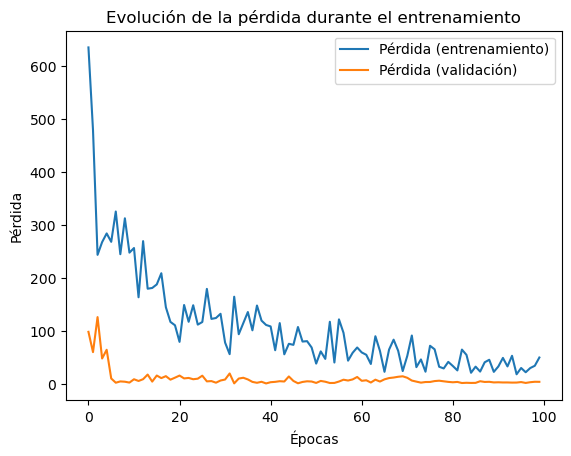

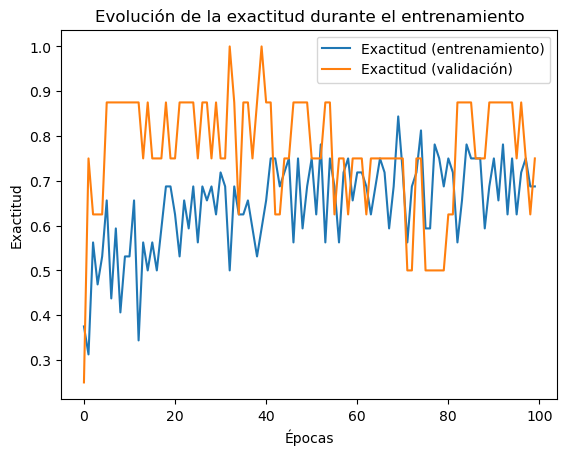

In [47]:
import matplotlib.pyplot as plt

# Gráfico de la evolución de la pérdida
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfico de la evolución de la exactitud
plt.plot(history.history['accuracy'], label='Exactitud (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Exactitud (validación)')
plt.title('Evolución de la exactitud durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()
